In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
from google.colab import files

In [ ]:
from string import punctuation

In [ ]:
import collections
from collections import defaultdict
from collections import Counter

In [ ]:
files.upload()

In [ ]:
df = pd.read_csv('train_s.csv')

In [ ]:
df

,Unnamed: 0,sentence,1category,2category,sentiment
0,4754,При этом всегда получал качественные услуги.,Communication,NaN,+
1,4417,"Не вижу, за что хотя бы 2 поставить, сервис на 1!",?,NaN,−
2,3629,"Вот так ""Мой любимый"" банк МКБ меня обманул.",?,NaN,−
3,11640,Отвратительное отношение к клиентам.,Communication,NaN,−
4,5571,"Всегда в любое время дня и ночи помогут, ответ...",Communication,NaN,+
...,...,...,...,...,...
19356,8004,Никогда и ни в коем случае не открывайте счет ...,Communication,NaN,−
19357,18182,ТИ откровенно забили на качество и развивают с...,Quality,NaN,−
19358,744,"Я считаю, это прорыв и лидерство финансовых ус...",?,NaN,+
19359,6220,"Писал мужчина очень доходчиво, не финансовым я...",Communication,NaN,+


# Баланс классов

In [ ]:
df.sentiment.value_counts()

−    10192
+     6262
?     2907
Name: sentiment, dtype: int64

In [ ]:
df['1category'].value_counts()

Communication    7193
?                5926
Quality          5630
Price             366
Safety            246
Name: 1category, dtype: int64

In [ ]:
negative_count = len(df[df.sentiment == '−'])
neutral_count = len(df[df.sentiment == '?'])
positive_count = len(df[df.sentiment == '+'])
x = ['Баланс классов']
x_indexes = np.arange(len(x))
width = 0.25

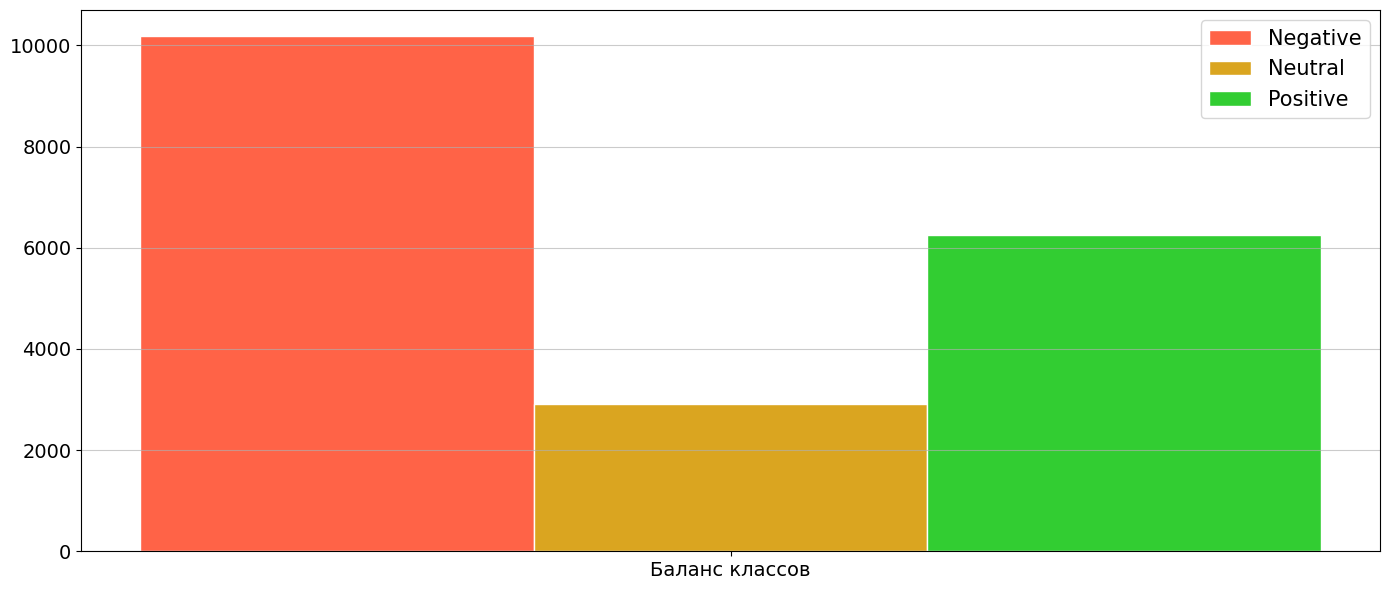

In [ ]:
plt.figure(figsize=(14,6))

plt.bar(x_indexes - width, negative_count, width=width, label='Negative', edgecolor='white', color='tomato')
plt.bar(x_indexes, neutral_count, width=width, label='Neutral', edgecolor='white', color='goldenrod')
plt.bar(x_indexes + width, positive_count, width=width, label='Positive', edgecolor='white', color='limegreen')

plt.yticks(fontsize=14)
plt.xticks(ticks=x_indexes, labels=x, fontsize=14)

plt.legend(prop={'size':15})
plt.grid(axis='y', alpha=0.65)
plt.tight_layout()

<Axes: title={'center': 'Status'}, xlabel='1category', ylabel='Count'>

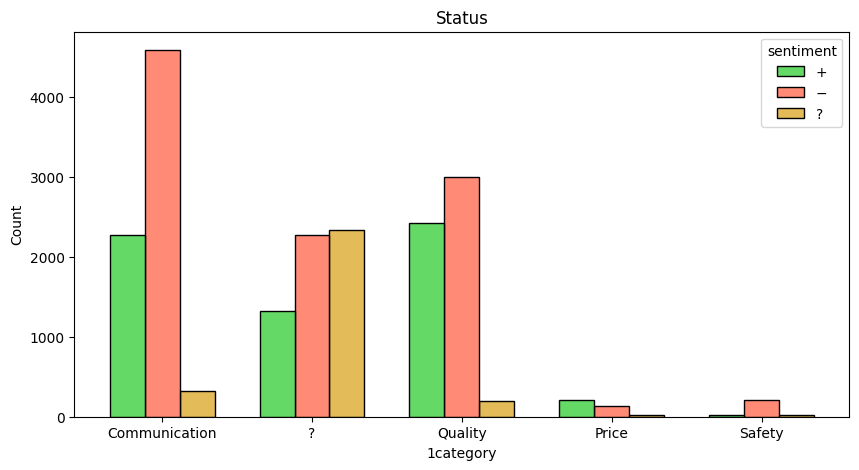

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Status')
sns.histplot(data = df, x = '1category', hue = 'sentiment', multiple="dodge", shrink = 0.7, palette=['limegreen', 'tomato', 'goldenrod'])

<Axes: title={'center': 'Status'}, xlabel='2category', ylabel='Count'>

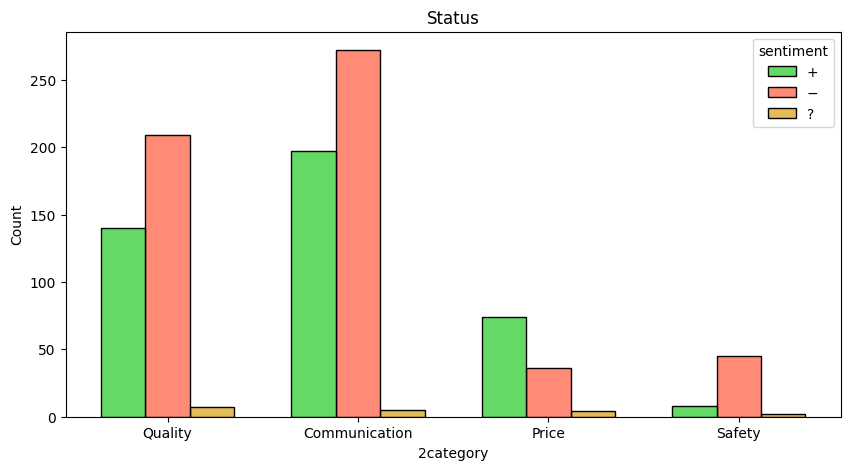

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Status')
sns.histplot(data = df, x = '2category', hue = 'sentiment', multiple="dodge", shrink = 0.7, palette=['limegreen', 'tomato', 'goldenrod'])

In [ ]:
plt.figure(figsize=(14,6))

plt.bar(x_indexes - width, negative_count, width=width, label='Negative', edgecolor='white', color='#ff4500')
plt.bar(x_indexes, neutral_count, width=width, label='Neutral', edgecolor='white', color='#50C878')
plt.bar(x_indexes + width, positive_count, width=width, label='Positive', edgecolor='white', color='#1DA1F2')

plt.yticks(fontsize=14)
plt.xticks(ticks=x_indexes, labels=x, fontsize=14)

plt.legend(prop={'size':15})
plt.grid(axis='y', alpha=0.65)
plt.tight_layout()

# N-граммы

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopwords_list = stopwords.words('russian')
for word in ['не', 'нет', 'да', 'никогда', 'без', 'хорошо', 'лучше']:
  stopwords_list.remove(word)

In [ ]:
sent_pos = df[df["sentiment"] == '+'].dropna()
sent_neut = df[df["sentiment"] == '?'].dropna()
sent_neg = df[df["sentiment"] == '−'].dropna()
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in stopwords_list and token not in punctuation]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

In [ ]:
pos_str = str(sent_pos['sentence'])
pos_list = pos_str.split()
neg_str = str(sent_neg['sentence'])
neg_list = neg_str.split()
freq_dict_good = Counter(pos_list)
freq_dict_bad = Counter(neg_list)
print(len(freq_dict_good), 'good-only words')
print(len(freq_dict_bad), 'bad-only words')
most_freq_good = dict(freq_dict_good.most_common(30)).keys()
most_freq_bad = dict(freq_dict_bad.most_common(30)).keys()
words_good_only = set(most_freq_good).difference(set(most_freq_bad))
words_bad_only = set(most_freq_bad).difference(set(most_freq_good))
words_good_only

85 good-only words
87 bad-only words


{'10',
 '178',
 '276',
 '32',
 '86',
 '«чайников»',
 'Начну',
 'Точка',
 'для',
 'и',
 'и...',
 'идеально',
 'ка...',
 'мне',
 'названием...',
 'под',
 'пользовался',
 'пользуюсь',
 'походит',
 'предложили',
 'продукт',
 'с',
 'таких',
 'того,',
 'ус...',
 'чудо',
 'этот',
 'я'}

In [ ]:
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [ ]:
from plotly import tools
from plotly.offline import iplot
import plotly.graph_objs as go

Биграммы

In [ ]:
freq_dict = defaultdict(int)
for sent in sent_pos["sentence"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'limegreen')

freq_dict = defaultdict(int)
for sent in sent_neg["sentence"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'tomato')

fig = tools.make_subplots(rows=2, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Bigram plots of Positive sentences", 
                                          "Bigram plots of Negative sentences"
                                          ])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)


fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.9/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Триграммы

In [ ]:
freq_dict = defaultdict(int)
for sent in sent_pos["sentence"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'limegreen')

freq_dict = defaultdict(int)
for sent in sent_neg["sentence"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'tomato')

fig = tools.make_subplots(rows=2, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Trigram plots of Positive sentences", 
                                          "Trigram plots of Negative sentences"
                                          ])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)


fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.9/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# Wordcloud

In [ ]:
import wordcloud
from wordcloud import WordCloud

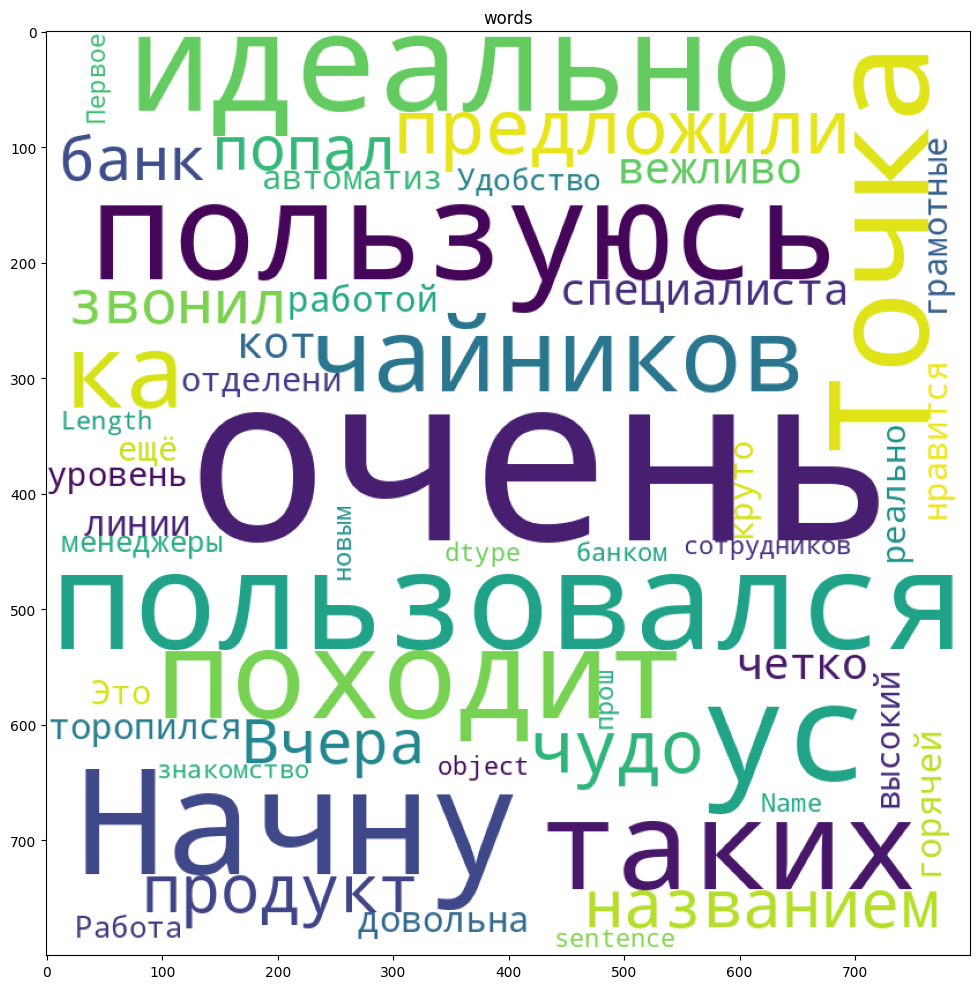

In [ ]:
wc = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords_list,
                min_font_size = 10,
                normalize_plurals=True).generate(str(sent_pos["sentence"]))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10), facecolor=None)
ax.imshow(wc)
ax.set_title(f'words')

plt.tight_layout()

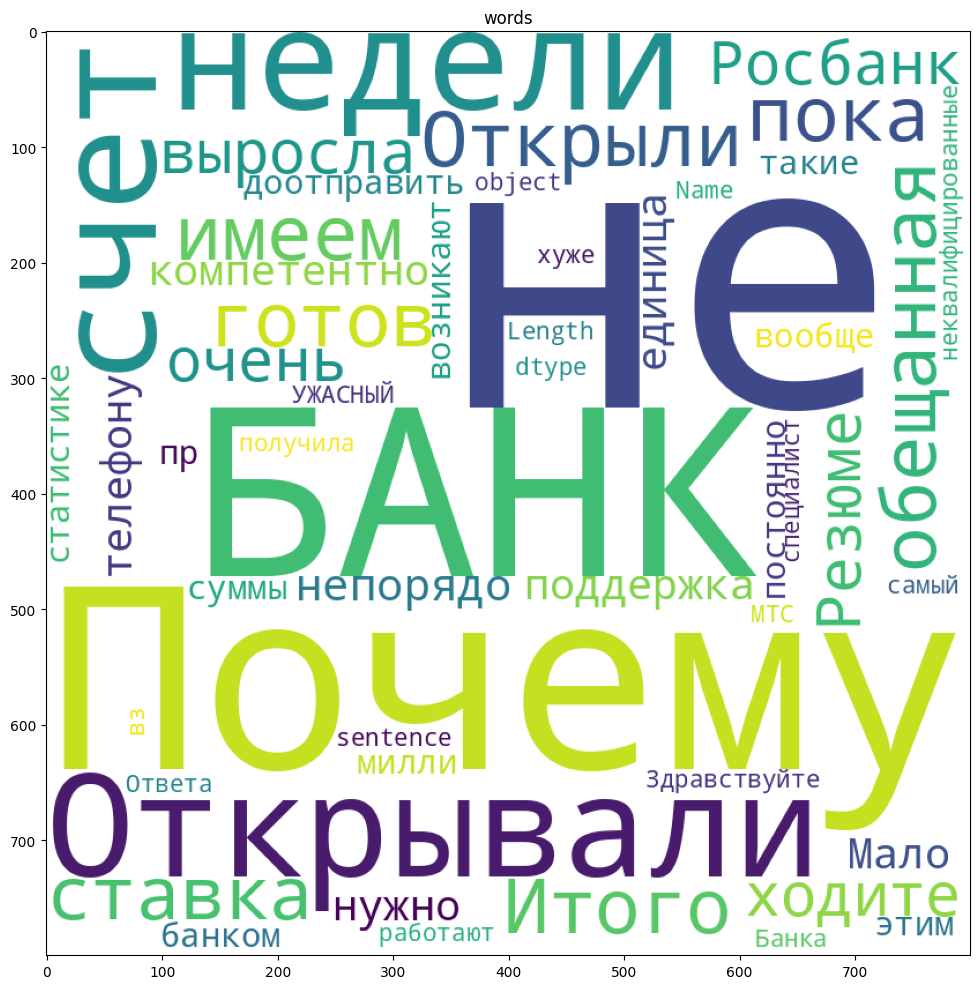

In [ ]:
wc = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords_list,
                min_font_size = 10,
                normalize_plurals=True).generate(str(sent_neg['sentence']))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10), facecolor=None)
ax.imshow(wc)
ax.set_title(f'words')

plt.tight_layout()

In [ ]:
negative_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords_list,
                min_font_size = 10).generate(str(sent_neg["sentence"]))

neutral_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords_list,
                min_font_size = 10).generate(str(sent_neut["sentence"]))

positive_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords_list,
                min_font_size = 10).generate(str(sent_pos["sentence"]))

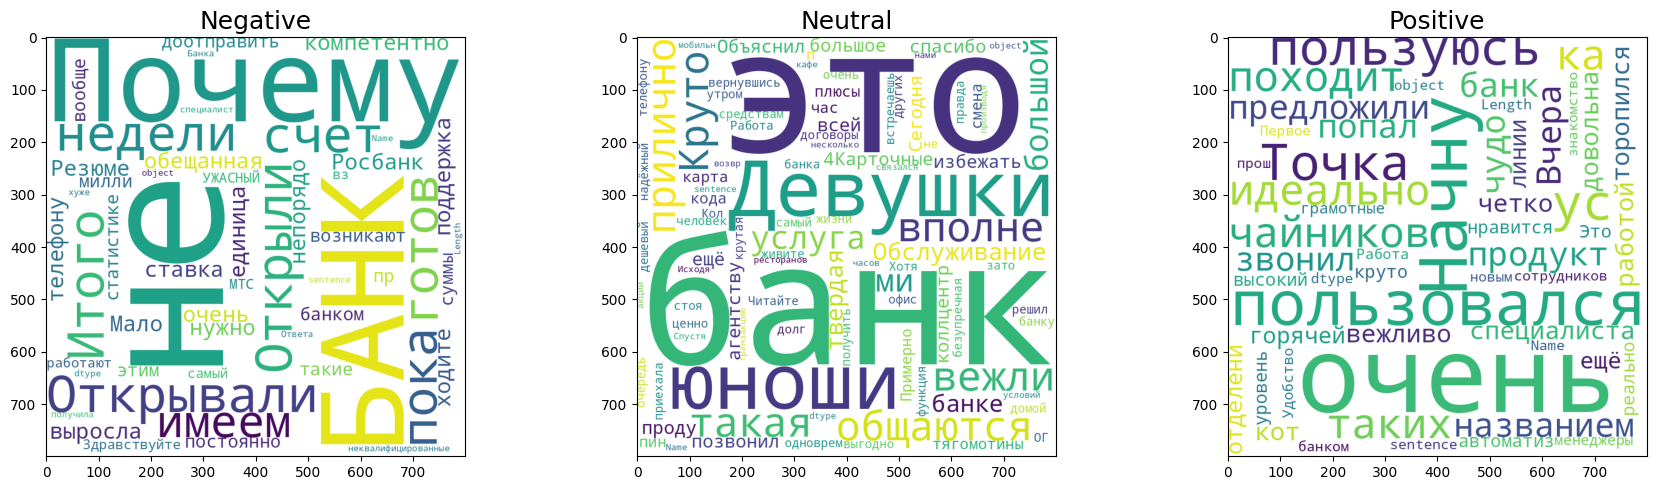

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), facecolor=None)

ax1.imshow(negative_cloud)
ax1.set_title('Negative', fontsize=18, color='black')


ax2.imshow(neutral_cloud)
ax2.set_title('Neutral', fontsize=18, color='black')

ax3.imshow(positive_cloud)
ax3.set_title('Positive', fontsize=18, color='black')

plt.tight_layout()

In [ ]:
df['1category'].value_counts()

Communication    7193
?                5926
Quality          5630
Price             366
Safety            246
Name: 1category, dtype: int64

In [ ]:
df['2category'].value_counts()

Communication    474
Quality          356
Price            114
Safety            55
Name: 2category, dtype: int64

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def preprocess(string):
  word_tokens = word_tokenize(string.lower())
  return " ".join([lemmatizer.lemmatize(w) for w in word_tokens if not w in stopwords_list and w.isalpha()])

In [ ]:
df['sentence'] = df['sentence'].map(preprocess)

In [ ]:
df.sentence

0                              получал качественные услуги
1                            не вижу хотя поставить сервис
2                                 любимый банк мкб обманул
3                        отвратительное отношение клиентам
4               любое время дня ночи помогут ответят решат
                               ...                        
19356    никогда коем случае не открывайте счет недосто...
19357    ти откровенно забили качество развивают свои м...
19358    считаю это прорыв лидерство финансовых услуг н...
19359    писал мужчина очень доходчиво не финансовым яз...
19360    данная ситуация сильно выбила колеи вместо зан...
Name: sentence, Length: 19361, dtype: object